The project aims to develop a machine learning system to predict the survival of passengers on the Titanic using various socio-economic and demographic factors such as socio-economic status, age, and gender. Utilizing the well-known Titanic dataset from Kaggle, I implemented the system using Random Forest Classifier. After preprocessing the data, handling missing values, encoding categorical variables, and scaling the features, I trained and evaluated the models, achieving high accuracy. 

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset using pandas library

titanicData = pd.read_csv('Titanic-DataSet.csv')
titanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# displaying the first 5 rows of the data frame
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# displaying the last 5 rows of the data frame
titanicData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# statistical summary of the DataFrame
titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# summary of the DataFrame
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


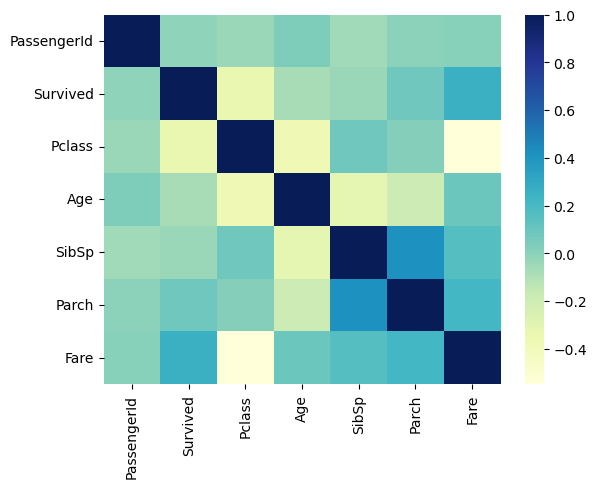

In [7]:
# Using a heatmap to see the correration between the independent variables to the dependent variable (survived) 

sns.heatmap(titanicData.corr(), cmap="YlGnBu")
plt.show()

##### We split the dataset to train and test data i.e 80% training dataset, 20% testing dataset.
We shall reshuffle the data using the StratifiedShuffleSplit to obtain randomness

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

# we split and make sure the survived, pclass and sex are equally distributed
for train_indices, test_indices in split.split(titanicData, titanicData[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanicData.loc[train_indices]
    strat_test_set  = titanicData.loc[test_indices]

In [9]:
# Visulize the data to be used for training the model

strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.650,F G63,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.050,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.750,NaN,Q
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.650,F G73,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.250,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.750,NaN,S


### Checking for nill values

In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 699 to 7
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


### Preprocessing
Visualizing Missing Values. Missing values can be problematic for machine learning models as they may result in biased or inaccurate results. So visualizing them would help in understanding the extent and pattern of missing data.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X


#### Encoding categorical variable involves converting categorical data into numerical data that can be processed by machine learning models.

In [12]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [13]:
# Dropping the irrelevant columns

class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked","Sex","Ticket","Name","Cabin","N"], axis=1, errors = "ignore")

In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [15]:
# run the train dataset through the pipeline

strat_train_set = pipeline.fit_transform(strat_train_set)

In [16]:
# Check whether after running the dataset through the pipeline whether there still exist null values

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 699 to 7
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [17]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
699,700,0,3,42.000000,0,0,7.650,0.0,0.0,1.0,0.0,1.0
611,612,0,3,29.509368,0,0,7.050,0.0,0.0,1.0,0.0,1.0
678,679,0,3,43.000000,1,6,46.900,0.0,0.0,1.0,1.0,0.0
260,261,0,3,29.509368,0,0,7.750,0.0,1.0,0.0,0.0,1.0
728,729,0,2,25.000000,1,0,26.000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,4.000000,4,2,31.275,0.0,0.0,1.0,0.0,1.0
715,716,0,3,19.000000,0,0,7.650,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.000000,1,1,20.250,0.0,0.0,1.0,1.0,0.0
775,776,0,3,18.000000,0,0,7.750,0.0,0.0,1.0,0.0,1.0


In [18]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis = 1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [19]:
# The training dataset in form of an array

X_data

array([[ 0.972941  ,  0.82789342,  0.97003704, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [ 0.63483831,  0.82789342,  0.        , ...,  0.61848547,
        -0.73561236,  0.73561236],
       [ 0.8922574 ,  0.82789342,  1.04769821, ...,  0.61848547,
         1.35941164, -1.35941164],
       ...,
       [-0.64073093,  0.82789342,  0.42640886, ...,  0.61848547,
         1.35941164, -1.35941164],
       [ 1.26493878,  0.82789342, -0.893831  , ...,  0.61848547,
        -0.73561236,  0.73561236],
       [-1.68577561,  0.82789342, -2.13640969, ...,  0.61848547,
        -0.73561236,  0.73561236]])

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5, 10], 
     "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [21]:
# we check the best estimator

final_clf = grid_search.best_estimator_

In [22]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [23]:
# run the test dataset through the pipeline

strat_test_set = pipeline.fit_transform(strat_test_set)

In [24]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
228,229,0,2,18.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
301,302,1,3,30.450208,2,0,23.2500,0.0,1.0,0.0,0.0,1.0
417,418,1,2,18.000000,0,2,13.0000,0.0,0.0,1.0,1.0,0.0
540,541,1,1,36.000000,0,2,71.0000,0.0,0.0,1.0,1.0,0.0
586,587,0,2,47.000000,0,0,15.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,0,3,21.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
270,271,0,1,30.450208,0,0,31.0000,0.0,0.0,1.0,0.0,1.0
175,176,0,3,18.000000,1,1,7.8542,0.0,0.0,1.0,0.0,1.0
814,815,0,3,30.500000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [25]:
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [26]:
# accuracy_score of the model

final_clf.score(X_data_test, y_data_test)

0.8156424581005587

##### Since the accuracy score of the trained model is high, we do a prediction on the whole titanic dataset

In [27]:
# We pass the whole dataset through the pipeline defined earlier

final_data = pipeline.fit_transform(titanicData)

In [28]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [29]:
# We seperate the target variable which is the survived column

X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [30]:
# Random Forest Classifier production model (prod_clf)

prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5, 10], 
     "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [31]:
# we look fo the best production classifier estimator

prod_final_clf = grid_search.best_estimator_

In [32]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

##### Since we have the production classifier we can load a new Titanic Test DataSet  and make predictions of the survival rate from it

In [33]:
# Loading the titanic test dataset

titanic_test_data = pd.read_csv("Titanic_Test_DataSet.csv")

In [34]:
titanic_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
# We run it through the pipeline for the preprocessing stage

final_test_data = pipeline.fit_transform(titanic_test_data)

In [36]:
final_test_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,1,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,0,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,0,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,1,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,0,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,0,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [37]:
# check for null values

final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   C            418 non-null    float64
 8   S            418 non-null    float64
 9   Q            418 non-null    float64
 10  Female       418 non-null    float64
 11  Male         418 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 39.3 KB


In [38]:
# fill the existing null values and scale the numeric values in our dataset

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")
X_final_test_data = X_final_test.drop(["Survived"], axis=1)

scaler = StandardScaler()

X_data_final_test = scaler.fit_transform(X_final_test_data)

In [39]:
predictions = prod_final_clf.predict(X_data_final_test)

In [40]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### We produce the final data frame from the predictions made by the production classifier.
##### The dataframe has 2 columns, PassengerId column and Survived column.
##### Survival value of 0 means the passenger did not survive.
##### Survival value of 1 means the passenger did survive.

In [41]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions
final_df.to_csv("Predictions.csv", index=False)

In [42]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
